In [24]:
import pandas as pd

path = r'D:\UET\After_Mid\Project\\'

data = pd.read_csv(path + 'ai4i2020.csv')

df = data[['UDI','Product ID','Type','Air temperature [K]',	'Process temperature [K]','Rotational speed [rpm]',	'Torque [Nm]','Tool wear [min]','Machine failure']]

#df.to_csv(path + 'machine_learning_predictive.csv')

df.head(1)




,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0


In [25]:
df.info() , df.isnull().sum(), df.shape





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


(None,
 UDI                        0
 Product ID                 0
 Type                       0
 Air temperature [K]        0
 Process temperature [K]    0
 Rotational speed [rpm]     0
 Torque [Nm]                0
 Tool wear [min]            0
 Machine failure            0
 dtype: int64,
 (10000, 9))

In [26]:

df.groupby(['UDI']).size().reset_index()
df.groupby(['Product ID']).size().reset_index()
df = df.copy() 
df.drop(['UDI', 'Product ID'],axis=1,inplace=True)





In [27]:
# Rename the Target column from Machine failure to IsFail
df = df.rename(columns = {'Machine failure': "IsFail"})
df.info()
df.groupby(['IsFail']).size().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   IsFail                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


,IsFail,0
0,0,9661
1,1,339


In [28]:

df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype(float)
df['Tool wear [min]'] = df['Tool wear [min]'].astype(float)

df['Type'] = df['Type'].map({'L': 0, 'M': 1, 'H': 2})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   IsFail                   10000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 547.0 KB


In [29]:
#df.head(1)
df.describe()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],IsFail
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,0.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,0.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,1.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,2.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


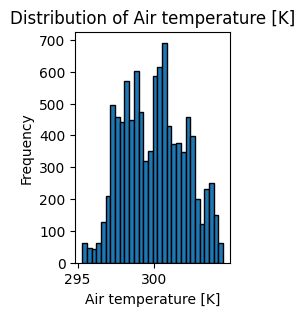

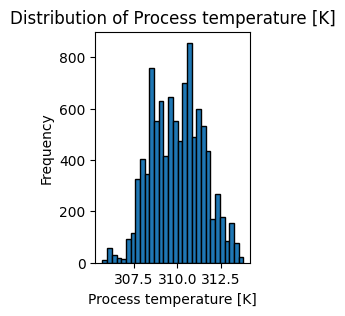

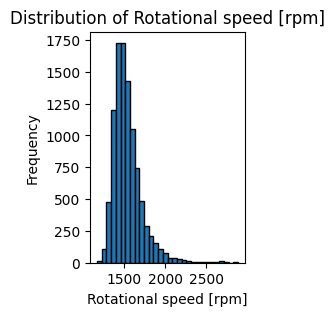

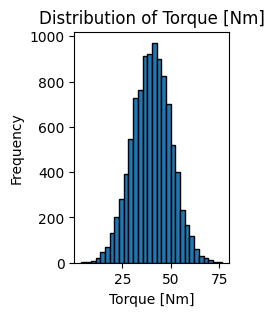

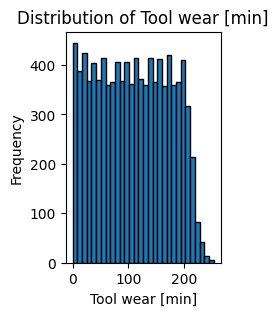

In [30]:

#df.groupby(['Type','IsFail']).size().reset_index()
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 
                     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Loop through each column and plot its histogram separately
for column in numerical_columns:
    plt.figure(figsize=(2, 3))  # Set figure size
    plt.hist(df[column], bins=30, edgecolor='black')  # Plot histogram
    plt.title(f'Distribution of {column}')  # Set the title
    plt.xlabel(column)  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.show()  # Display the plot




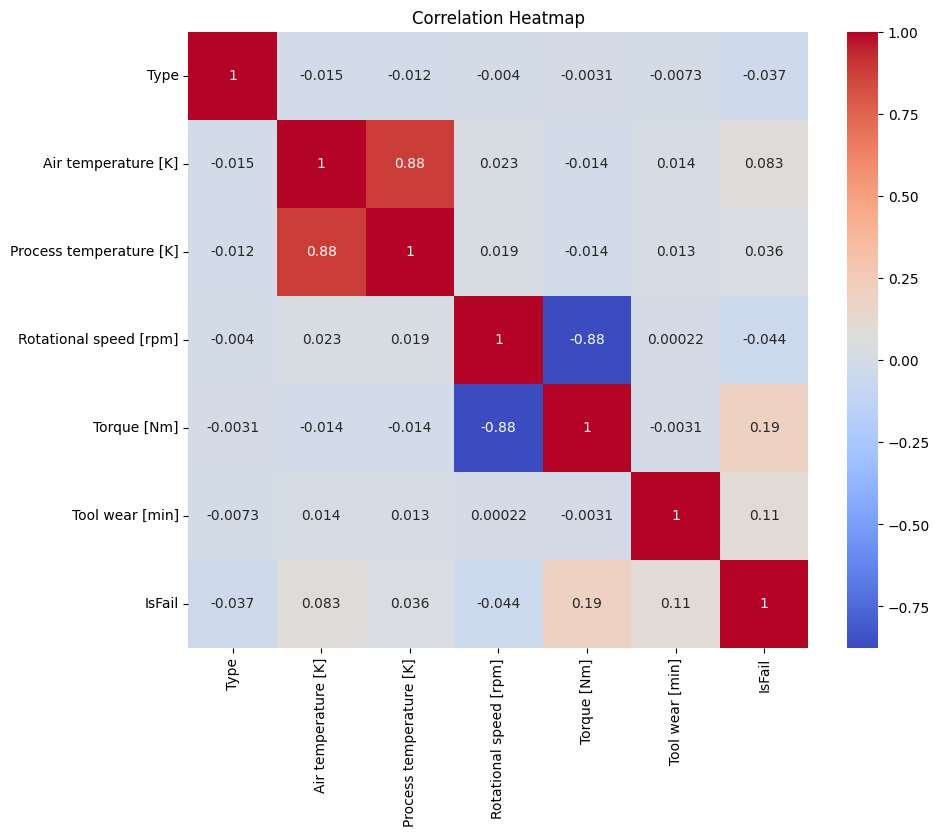

In [ ]:
import seaborn as sns


# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_df.corr()


# Create a heatmap with annotations and color map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Display the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


In [32]:

from sklearn.model_selection import train_test_split

# Split df into features and target

X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df['IsFail']

# Split the dataset into the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
#model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



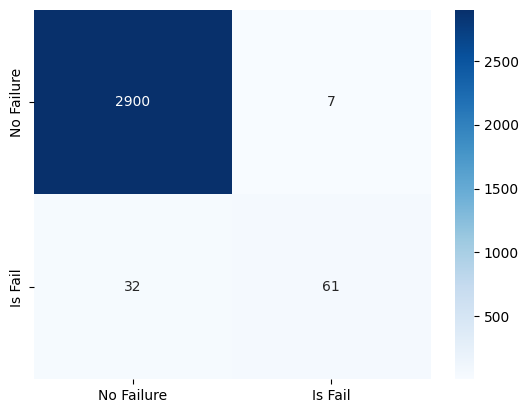

In [34]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Is Fail"], 
            yticklabels=["No Failure", "Is Fail"])
plt.show()

In [35]:
# Evaluate model
from sklearn.metrics import accuracy_score , recall_score , f1_score,roc_auc_score , precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
presision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
roc = roc_auc_score(y_test, y_pred)



print(f"Accuracy: {accuracy} Recall: {recall} Presision: {presision} F1: {f1} AUC : {roc}")


Accuracy: 0.987 Recall: 0.987 Presision: 0.8970588235294118 F1: 0.9860185133377088 AUC : 0.8267529988792347


In [36]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your feature matrix and 'y' is the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())


IsFail
0    9661
1    9661
Name: count, dtype: int64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
#model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


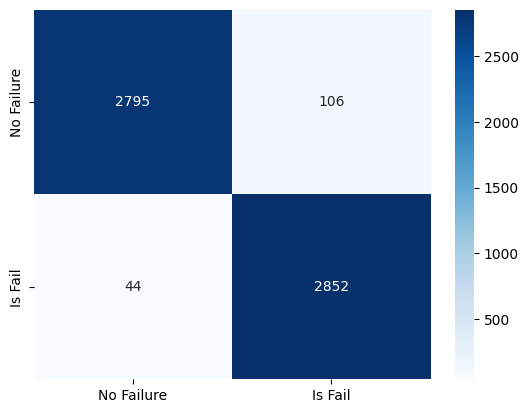

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Is Fail"], 
            yticklabels=["No Failure", "Is Fail"])
plt.show()

In [39]:
# Evaluate model
from sklearn.metrics import accuracy_score , recall_score , f1_score , roc_auc_score , precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
presision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
roc = roc_auc_score(y_test, y_pred)



print(f"Accuracy: {accuracy} Recall: {recall} Presision: {presision} F1: {f1} AUC : {roc}")



Accuracy: 0.9741245471795756 Recall: 0.9741245471795756 Presision: 0.9641649763353617 F1: 0.9741218257951604 AUC : 0.9741337526972029


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Define the parameter grid
param_grid = {
    'n_estimators': [50,100],  # Number of trees
    'max_depth': [None,10,20],  # Max depth of the trees
    'min_samples_split': [2,5],  # Min samples to split a node
    'min_samples_leaf': [1,2],  # Min samples in a leaf node
    'max_features': ['sqrt'],  # Number of features to consider
    'class_weight': [None,'balanced']  # Class weighting for imbalanced data
}

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
y_pred = grid_search.predict(X_test)

# Print classification report and confusion matrix

print(f"Accuracy: {accuracy} Recall: {recall} Presision: {presision} F1: {f1} AUC : {roc}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9689463955637709
Accuracy: 0.9741245471795756 Recall: 0.9741245471795756 Presision: 0.9641649763353617 F1: 0.9741218257951604 AUC : 0.9741337526972029
Confusion Matrix:
[[2796  105]
 [  48 2848]]
